In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

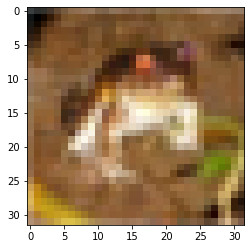

In [5]:
plt.imshow(X_train[0])

In [6]:
Y_train[0]

array([6], dtype=uint8)

In [7]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
# Convert 2D to 1D
Y_train=Y_train.reshape(-1,)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
classes[Y_train[0]]

'frog'

In [11]:
def plot_sample(X,Y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

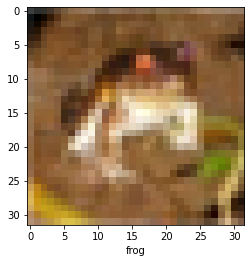

In [12]:
plot_sample(X_train,Y_train,0)

In [13]:
# Convert 2D to 1D
Y_test=Y_test.reshape(-1,)
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

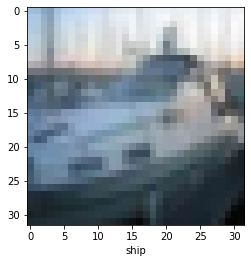

In [14]:
plot_sample(X_test,Y_test,2)

In [15]:
# Scaling

X_train=X_train/255
X_test=X_test/255

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Using Basic ANN

In [17]:
ann=Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(3000,activation='relu'))
ann.add(Dense(1000,activation='relu'))
ann.add(Dense(10,activation='sigmoid'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
ann.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 249s 158ms/step - loss: 1.8120 - accuracy: 0.3521
Epoch 2/10
1563/1563 [==============================] - 232s 149ms/step - loss: 1.6245 - accuracy: 0.4262
Epoch 3/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.5434 - accuracy: 0.4550
Epoch 4/10
1563/1563 [==============================] - 204s 130ms/step - loss: 1.4825 - accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 220s 141ms/step - loss: 1.4316 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.3925 - accuracy: 0.5097
Epoch 7/10
1563/1563 [==============================] - 220s 141ms/step - loss: 1.3527 - accuracy: 0.5231
Epoch 8/10
1563/1563 [==============================] - 245s 157ms/step - loss: 1.3176 - accuracy: 0.5341
Epoch 9/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.2887 - accuracy: 0.5478
Epoch 10/10
1563/1563 [=======================

In [21]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 17s 52ms/step - loss: 1.4050 - accuracy: 0.5022


[1.405015230178833, 0.5022000074386597]

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report : \n',classification_report(Y_test,y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.42      0.75      0.54      1000
           1       0.67      0.59      0.63      1000
           2       0.46      0.35      0.40      1000
           3       0.41      0.23      0.30      1000
           4       0.55      0.36      0.44      1000
           5       0.39      0.50      0.44      1000
           6       0.57      0.57      0.57      1000
           7       0.66      0.51      0.58      1000
           8       0.79      0.39      0.52      1000
           9       0.42      0.75      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.50     10000
weighted avg       0.53      0.50      0.50     10000



### Using ANN, Train_acc=55 and Test_acc=50

## Using basic CNN

In [23]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(10,activation='softmax'))


In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,626,442
Trainable params: 1,626,442
Non-trainable params: 0
____________________________________________

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 313s 200ms/step - loss: 1.3038 - accuracy: 0.5345
Epoch 2/10
1563/1563 [==============================] - 314s 201ms/step - loss: 0.9501 - accuracy: 0.6675
Epoch 3/10
1563/1563 [==============================] - 296s 189ms/step - loss: 0.7707 - accuracy: 0.7307
Epoch 4/10
1563/1563 [==============================] - 361s 231ms/step - loss: 0.6260 - accuracy: 0.7820
Epoch 5/10
1563/1563 [==============================] - 410s 263ms/step - loss: 0.4893 - accuracy: 0.8302
Epoch 6/10
1563/1563 [==============================] - 380s 243ms/step - loss: 0.3646 - accuracy: 0.8716
Epoch 7/10
1563/1563 [==============================] - 367s 234ms/step - loss: 0.2580 - accuracy: 0.9097
Epoch 8/10
1563/1563 [==============================] - 346s 222ms/step - loss: 0.1850 - accuracy: 0.9355
Epoch 9/10
1563/1563 [==============================] - 309s 197ms/step - loss: 0.1354 - accuracy: 0.9524 - loss: 0.1353 
Epoch 10/10
1563/1563 [=======

In [27]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 17s 53ms/step - loss: 1.8647 - accuracy: 0.6683


[1.864743947982788, 0.6682999730110168]

### Using Basic CNN, Train_acc=96 and Test_acc=66, which means there is overfitting

## Using CNN+Dropout

In [29]:
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 373s 237ms/step - loss: 1.5803 - accuracy: 0.4261
Epoch 2/10
1563/1563 [==============================] - 373s 239ms/step - loss: 1.2514 - accuracy: 0.5510
Epoch 3/10
1563/1563 [==============================] - 433s 277ms/step - loss: 1.1343 - accuracy: 0.5999
Epoch 4/10
1563/1563 [==============================] - 384s 245ms/step - loss: 1.0497 - accuracy: 0.6283
Epoch 5/10
1563/1563 [==============================] - 393s 252ms/step - loss: 0.9903 - accuracy: 0.6496
Epoch 6/10
1563/1563 [==============================] - 445s 285ms/step - loss: 0.9365 - accuracy: 0.6685
Epoch 7/10
1563/1563 [==============================] - 371s 237ms/step - loss: 0.8810 - accuracy: 0.6876
Epoch 8/10
1563/1563 [==============================] - 413s 264ms/step - loss: 0.8329 - accuracy: 0.7030
Epoch 9/10
1563/1563 [==============================] - 478s 306ms/step - loss: 0.7901 - accuracy: 0.7163
Epoch 10/10
1563/1563 [=======================

In [33]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 22s 67ms/step - loss: 0.8946 - accuracy: 0.6993


[0.894550085067749, 0.6992999911308289]

### Using Basic CNN+Dropout, Train_acc=72 and Test_acc=69

## Using CNN+Data Augmentation

#### To reduce Overfitting use Data Augmentation

In [41]:
aug=Sequential()
aug.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(32,32,3)))
aug.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
aug.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.1))

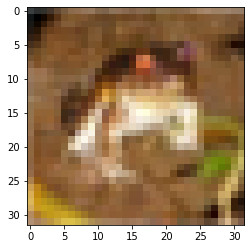

In [42]:
plt.imshow(X_train[0])

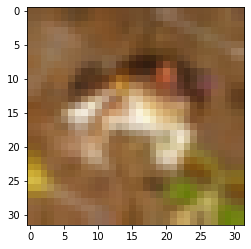

In [43]:
plt.imshow(aug(X_train)[0])

In [44]:
cnn=Sequential()
cnn.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(32,32,3)))
cnn.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
cnn.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.1))
cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [45]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_3 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_3 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)            

In [46]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 479s 303ms/step - loss: 1.4760 - accuracy: 0.4698
Epoch 2/10
1563/1563 [==============================] - 520s 333ms/step - loss: 1.2305 - accuracy: 0.5625
Epoch 3/10
1563/1563 [==============================] - 391s 250ms/step - loss: 1.1446 - accuracy: 0.5933
Epoch 4/10
1563/1563 [==============================] - 367s 235ms/step - loss: 1.0914 - accuracy: 0.6137
Epoch 5/10
1563/1563 [==============================] - 367s 235ms/step - loss: 1.0454 - accuracy: 0.6288
Epoch 6/10
1563/1563 [==============================] - 399s 255ms/step - loss: 1.0098 - accuracy: 0.6429
Epoch 7/10
1563/1563 [==============================] - 380s 243ms/step - loss: 0.9777 - accuracy: 0.6527
Epoch 8/10
1563/1563 [==============================] - 389s 249ms/step - loss: 0.9536 - accuracy: 0.6654
Epoch 9/10
1563/1563 [==============================] - 383s 245ms/step - loss: 0.9355 - accuracy: 0.6705
Epoch 10/10
1563/1563 [=======================

In [48]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 21s 66ms/step - loss: 1.0236 - accuracy: 0.6599


[1.0235517024993896, 0.6599000096321106]

### Using Basic CNN + Data Augmentation, Train_acc=67 and Test_acc=65

## CNN using Data Augmentation, Dropout and Batch Normalization

In [49]:
from tensorflow.keras.layers import BatchNormalization

In [50]:
cnn=Sequential()
cnn.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(32,32,3)))
cnn.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
# cnn.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.1))
cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Dropout(0.5))
cnn.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(10,activation='softmax'))

In [51]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)      

In [52]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 598s 381ms/step - loss: 1.6042 - accuracy: 0.4197
Epoch 2/10
1563/1563 [==============================] - 578s 370ms/step - loss: 1.3241 - accuracy: 0.5244
Epoch 3/10
1563/1563 [==============================] - 774s 495ms/step - loss: 1.2180 - accuracy: 0.5672
Epoch 4/10
1563/1563 [==============================] - 729s 466ms/step - loss: 1.1616 - accuracy: 0.5893
Epoch 5/10
1563/1563 [==============================] - 710s 455ms/step - loss: 1.1106 - accuracy: 0.6059
Epoch 6/10
1563/1563 [==============================] - 680s 435ms/step - loss: 1.0719 - accuracy: 0.6224
Epoch 7/10
1563/1563 [==============================] - 679s 435ms/step - loss: 1.0392 - accuracy: 0.6336
Epoch 8/10
1563/1563 [==============================] - 708s 453ms/step - loss: 1.0178 - accuracy: 0.6380
Epoch 9/10
1563/1563 [==============================] - 691s 442ms/step - loss: 0.9872 - accuracy: 0.6524
Epoch 10/10
1563/1563 [=======================

In [54]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 32s 102ms/step - loss: 0.8924 - accuracy: 0.6841


[0.8923748135566711, 0.6840999722480774]

### Using Basic CNN + Data Augmentation + Dropout + Batch Normalization, Train_acc=66 and Test_acc=68